In [1]:
import tensorflow as tf

## Loading - "MNIST Data Set"
### containing Training Samples = 60,000 , Testing Samples = 10,000
### TensorFlow already contains MNIST Data set which can be loaded usning keras

In [2]:
mnist = tf.keras.datasets.mnist  ## this is basically handwritten chracters based on 28x28 sized image of 0 to 9

#### After loading the mnist data , divite it into train and test datasets

In [3]:
#unpacking the dataset into train and test datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

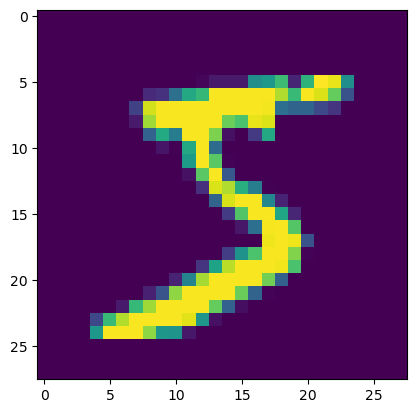

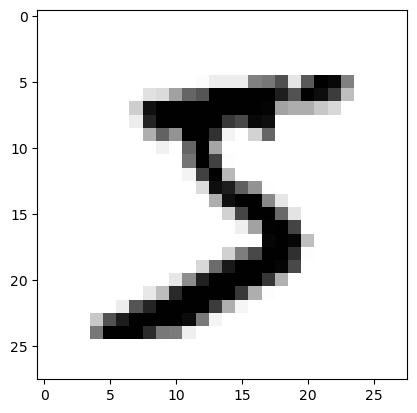

In [5]:
## just check the graph , how data looks like
import matplotlib.pyplot as plt ## pip install matplotlib
plt.imshow(x_train[0])
plt.show()  ## in order to execute the graph
## however we dont know whether its color image or binary images 
## so inorder to plot it change the configuration
plt.imshow(x_train[0],cmap =plt.cm.binary)

## checking the values of each pixel
### before Normalization

In [6]:
print(x_train[0])  ### before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

 ### As images are in Grey level(1 channel==>0 to 255),not colored(RGB)
 ## Normalizing the data | Pre-Processing Step

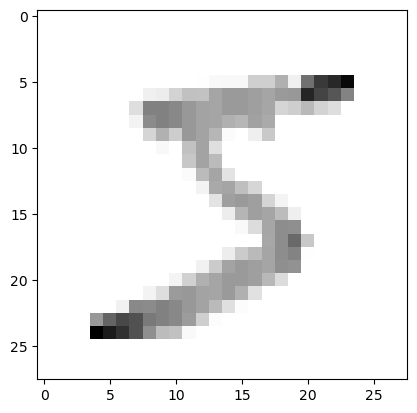

In [7]:
### you might have noticed that , its grey image and all values varies from 0 to 255
## in order to normalize it 
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[0],cmap = plt.cm.binary)

# After Normalization

In [8]:
print(x_train[0])  ### you can see all values are now normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])  ### just to check that we have labels inside our network

5


## Resizing image to make it suitable for apply convolution operation

In [10]:
import numpy as np ## pip install numpy
IMG_SIZE= 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) ##increasing one dimension for kernel=filter operaton and in python -1 corresponds to maximum value i.e 60,000 and 10,000
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) ##increasing one dimension for kernel operaton
print ("Training Samples dimension",x_trainr.shape)
print ("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network
### Training on 60,000 samples of MNIST handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation , Flatten , Conv2D , MaxPooling2D

In [12]:
#### Creating a neural network now

model = Sequential()

###### First Convolution Layer 0 1 2 3 (60,000,28,28,1)   28-3+1 = 26x26
model.add(Conv2D(64,(3,3) , input_shape = x_trainr.shape[1:]))  ## only for first convolution layer tp mention input layer size
model.add(Activation("relu")) ## activation function to make it non -linear if <0 then remove or if>0 allow
model.add(MaxPooling2D(pool_size=(2,2))) ## MaxPooling single maximum value of 2x2

###### Second Convolution Layer 
model.add(Conv2D(64,(3,3)))  ##2nd Convolution Layer
model.add(Activation("relu")) ## activation function 
model.add(MaxPooling2D(pool_size=(2,2))) ## MaxPooling

###### Third Convolution Layer 
model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu")) ## activation function 
model.add(MaxPooling2D(pool_size=(2,2))) ## MaxPooling

#### Fully Connected Layer #1 20x20=400
model.add(Flatten()) ### before using fully connected Layer,need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

#### Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

#### Last Fully Connected Layer , output must be equal to number of classes,10(0-9)
model.add(Dense(10)) ## this Last dense layer must be equal to 10
model.add(Activation('softmax')) ### activation function is changed to softmax (Class Probabilities)

C:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print ("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
model.fit(x_trainr,y_train,epochs=5,validation_split= 0.3) ## Training my model

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7826 - loss: 0.6590 - val_accuracy: 0.9622 - val_loss: 0.1202
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9664 - loss: 0.1136 - val_accuracy: 0.9694 - val_loss: 0.0974
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9765 - loss: 0.0763 - val_accuracy: 0.9770 - val_loss: 0.0824
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9831 - loss: 0.0556 - val_accuracy: 0.9788 - val_loss: 0.0685
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9861 - loss: 0.0442 - val_accuracy: 0.9769 - val_loss: 0.0760


In [17]:
### Evaluating on testing dataset MNIST
test_loss,test_acc= model.evaluate(x_testr,y_test)
print (" Test loss on 10,000 test samples" , test_loss)
print ("Validation Accuracy on 10,000 test samples",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9704 - loss: 0.0948
 Test loss on 10,000 test samples 0.07685667276382446
Validation Accuracy on 10,000 test samples 0.9753999710083008


In [41]:
# predictions = new_model.predict([x_test])  ##there is specialized method for efficiently saving your model , to
### therefore instead of using new model loaded , for now only for predictions i am using simple model
predicions = model.predict(x_testr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [42]:
print(predicions)

[[1.0289791e-07 2.1455055e-05 3.3594656e-06 ... 9.9996626e-01
  2.5001427e-08 5.2273399e-06]
 [2.4264264e-03 5.3228741e-05 9.9688810e-01 ... 2.3450497e-05
  1.1643776e-05 1.9385678e-05]
 [4.4147811e-05 9.9984193e-01 2.1918351e-05 ... 1.5095181e-05
  3.8556266e-07 1.7211392e-05]
 ...
 [4.8349396e-08 1.0870863e-06 5.6878287e-07 ... 7.0086372e-07
  3.6629401e-05 3.5824455e-04]
 [9.7418047e-09 2.2890086e-10 3.2763555e-12 ... 2.9126366e-14
  1.5906843e-06 1.3025853e-07]
 [6.8291358e-04 2.9810749e-07 6.0203809e-05 ... 4.4016903e-07
  3.1556940e-04 9.2699403e-05]]


In [43]:
## inorder to understand, convert the predictions from one hot encoding , we need to use numpy for that
print(np.argmax(predicions[0]))

7


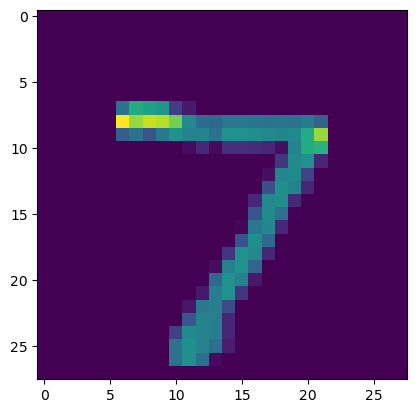

In [44]:
### now to check our answer is trueor not
plt.imshow(x_test[0])

In [45]:
## inorder to understand, convert the predictions from one hot encoding , we need to use numpy for that
print(np.argmax(predicions[131]))

6


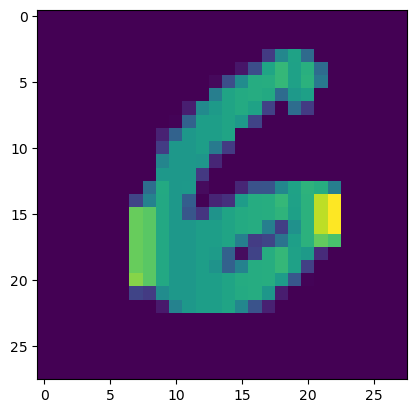

In [46]:
### now to check our answer is trueor not
plt.imshow(x_test[131])

In [47]:
  import cv2 ## pip install opencv-python

In [48]:
img = cv2.imread('three.png')

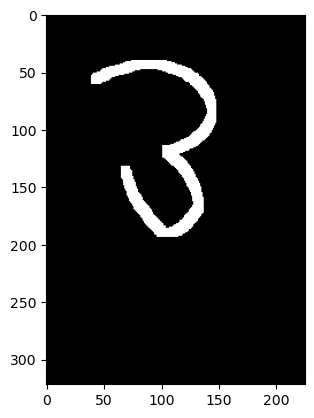

In [49]:
 plt.imshow(img)

In [50]:
img.shape

(322, 225, 3)

In [51]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [52]:
gray.shape

(322, 225)

In [53]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [54]:
resized.shape

(28, 28)

In [55]:
newimg = tf.keras.utils.normalize(resized,axis=1) ## 0 to 1 scaling

In [56]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) ## kernel operation of convolution layer

In [57]:
newimg.shape

(1, 28, 28, 1)

In [58]:
predicions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [59]:
print (np.argmax(predicions))

3


In [60]:
model.save("mnist_cnn_model.keras")


In [61]:
from tensorflow.keras.models import load_model
model = load_model("mnist_cnn_model.keras")


In [62]:
pip install --upgrade Pillow


Note: you may need to restart the kernel to use updated packages.


In [3]:
!python draw_digit_ui.py


[INFO] Starting prediction...
[INFO] Image resized.
[INFO] Image shape: (1, 28, 28, 1)

1/1 ==================== 0s 132ms/step
1/1 ==================== 0s 152ms/step
[INFO] Prediction: 3, Confidence: 1.00
[INFO] Starting prediction...
[INFO] Image resized.
[INFO] Image shape: (1, 28, 28, 1)

1/1 ==================== 0s 27ms/step
1/1 ==================== 0s 47ms/step
[INFO] Prediction: 2, Confidence: 1.00


2025-06-23 03:12:37.547119: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-23 03:12:39.364886: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-23 03:12:46.501903: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
